In [3]:
from baseband import dada
from baseband.data import SAMPLE_DADA

import numpy as np
from scipy import signal 

import astropy.units as u

import matplotlib.pyplot as plt

In [4]:
def get_part_payload(frame, start, stop):
    return frame.payload[start:stop][:, [0]].reshape(1, stop-start)[0]

In [5]:
test_dada_file = r'H:\com_dir_ub\test.dada'

In [6]:
with dada.open(test_dada_file) as fh:
    print(fh.info)

DADAStream information:
start_time = 2020-05-31T11:37:06.000000000
stop_time = 2020-05-31T11:37:26.000000000
sample_rate = 640.0 MHz
shape = (12800000000, 2)
format = dada
bps = 8
complex_data = False
verify = True
readable = True

checks:  decodable: True
         continuous: no obvious gaps

DADAFile information:
number_of_frames = 1
frame_rate = 0.049999999999999996 Hz
samples_per_frame = 12800000000
sample_shape = (2, 1)


In [7]:
with dada.open(test_dada_file, 'rb') as fh:
    #header_file = fh.read_header()
    frame = fh.read_frame()

In [8]:
part = get_part_payload(frame, 12800000, 25600000)

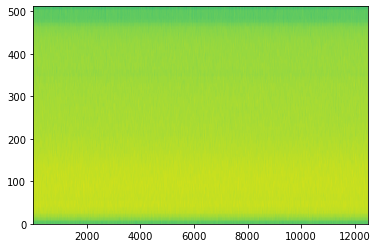

In [12]:
plt.close()
NFFT = 128  # the length of the windowing segments
Fs = 1024  # the sampling frequency
Pxx, freqs, bins, im = plt.specgram(part, NFFT=NFFT, Fs=Fs, noverlap=NFFT - 10)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the .image.AxesImage instance representing the data in the plot
plt.show()

In [13]:
edges_part = [(i * 12800000, (i + 1) * 12800000) for i in range(100)]

KeyboardInterrupt: 

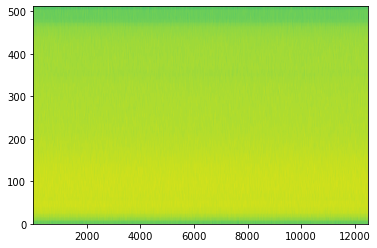

In [19]:
idx = 0
for left, right in edges_part[]:
    part = get_part_payload(frame, left, right)
    plt.close()
    NFFT = 128  # the length of the windowing segments
    Fs = 1024  # the sampling frequency
    plt.specgram(part, NFFT=NFFT, Fs=Fs, noverlap=NFFT - 10)
    plt.savefig(f'figures_test/{idx}.png', dpi=250)
    idx += 1

In [11]:
f, t, Sxx = signal.spectrogram(part, 1024)

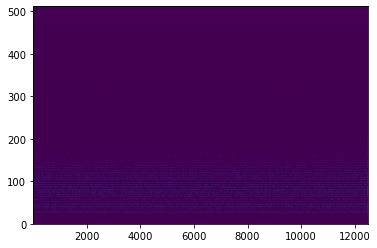

In [14]:
plt.pcolormesh(t, f, Sxx, shading='gouraud')

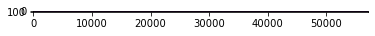